In [1]:
pip install numpy torch torchvision matplotlib

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/36/15/c48f74f8f8d382677ef016b65f09969028a1549b8a518c18894deb95b544/torchvision-0.17.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/14/60/12d4f27b859a74359306662da69c2d08826a2b05cfe7f96e66b490f41573/matplotlib-3.8.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pillow!=8.3.*,>=5.3.0 from https://files.pythonhosted.org/packages/00/5c/7633f291def20082bad31b844fe5ed07742aae8504e4cfe2f331ee727178/pillow-10.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/9f/6b/8a1ca4b81d426c104fe42b3cfad9488eaaef0a03fcf98eaecc22b628a013/contourpy-1.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages

In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [3]:
class Net(torch.nn.Module): # neural network main body
    def __init__(self):
        super().__init__()
        # input: 28 * 28 pixos image
        self.fc1 = torch.nn.Linear(28*28, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, 10) # output 10, number from 0-9
    
    # x: input image, relu as the activation function, log_softmax to compute the "probabilities"
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = torch.nn.functional.log_softmax(self.fc4(x), dim=1)
        return x

In [4]:
def get_data_loader(is_train):
    # tensor: multi-dimentional array, data transform type
    to_tensor = transforms.Compose([transforms.ToTensor()])
    # download dataset from MNIST
    data_set = MNIST("", is_train, transform=to_tensor, download=True)
    return DataLoader(data_set, batch_size=15, shuffle=True)

In [5]:
def evaluate(test_data, net):
    n_correct = 0
    n_total = 0
    with torch.no_grad():
        for (x, y) in test_data:
            # calculate the prediction of nn
            outputs = net.forward(x.view(-1, 28*28))
            for i, output in enumerate(outputs):
                # compare with the actual result
                if torch.argmax(output) == y[i]:
                    n_correct += 1
                n_total += 1
    return n_correct / n_total

In [6]:
def main():
    train_data = get_data_loader(is_train=True)
    test_data = get_data_loader(is_train=False)
    net = Net() # initialize the nn

    # accuracy before training, should be close to 0.1 as in total 10 numbers
    print("Initial accuracy:", evaluate(test_data, net))
    # adam optimizer used here, could be gradient decent
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # optimize the parameters in several rounds
    for epoch in range(2):
        for (x, y) in train_data:
            net.zero_grad() # initializing
            output = net.forward(x.view(-1, 28*28)) # feed forward
            loss = torch.nn.functional.nll_loss(output, y) # calculate the loss
            loss.backward() # back propergation
            optimizer.step() # optimize the parameters of nn
        print("epoch", epoch, "accuracy:", evaluate(test_data, net))
    
    # pick 3 images and show the prediction results
    for (n, (x, _)) in enumerate(test_data):
        if n > 3:
            break
        predict = torch.argmax(net.forward(x[0].view(-1, 28*28)))
        plt.figure(n)
        plt.imshow(x[0].view(28, 28))
        plt.title("prediction: " + str(int(predict)))
    plt.show()
        

100%|██████████| 9912422/9912422 [00:01<00:00, 6425676.06it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 11241248.50it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5218430.04it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10370456.60it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Initial accuracy: 0.1092
epoch 0 accuracy: 0.9492
epoch 1 accuracy: 0.9558


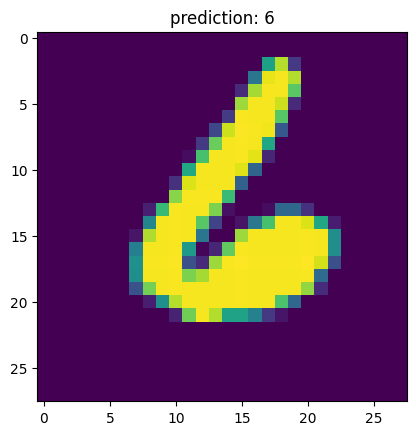

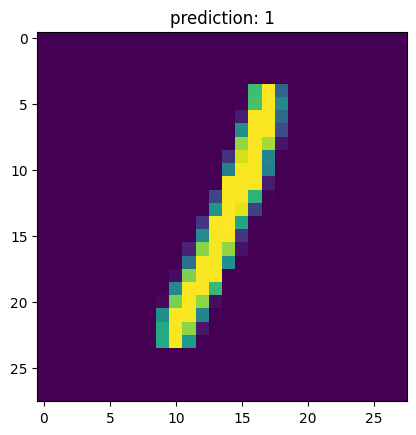

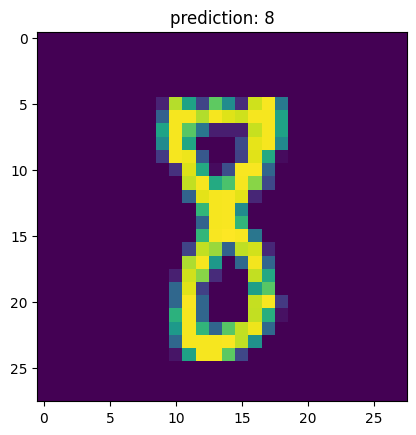

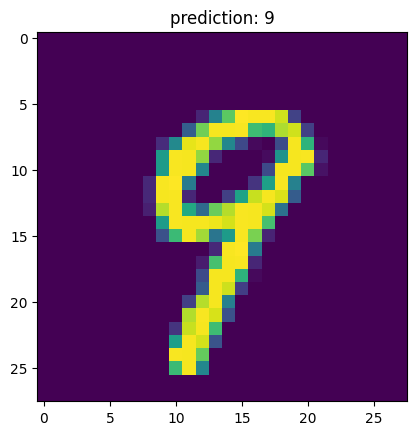

In [7]:

main()